In [1]:
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
import cv2
from PIL import Image

In [2]:
from keras.datasets import mnist

2023-02-12 23:06:07.552815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
train_X.shape

(60000, 28, 28)

In [5]:
def show_img(img):
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()

In [6]:
train_X[0].shape

(28, 28)

In [8]:
train_X_0 = train_X[train_y==0,:]

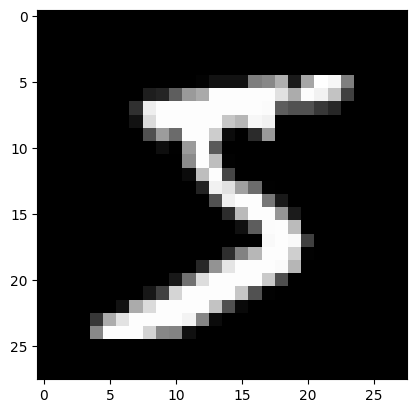

In [9]:
show_img(train_X[0])

In [10]:
X_centroid = np.mean(train_X_0, axis=0)

In [11]:
len(set(train_y))

10

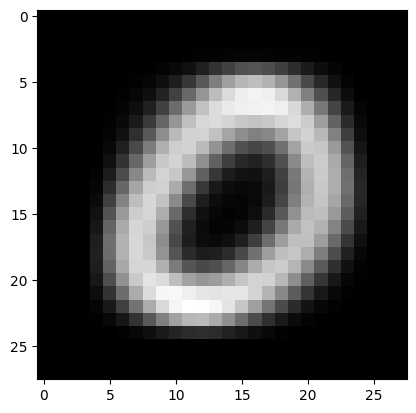

In [12]:
show_img(X_centroid)

In [13]:
def calculate_centroid(train_X, train_y):
    centroids = []
    for i in range(len(set(train_y))):
        data = train_X[train_y==i,:]
        centroid = np.mean(data, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

def distances(x_test, centroids):
    centroids = centroids.reshape(centroids.shape[0], centroids.shape[1]*centroids.shape[2])
    x_test = x_test.reshape(x_test.shape[0]*x_test.shape[1])
    X2 = np.sum(centroids*centroids, 1)
    z2 = np.sum(x_test*x_test)
    D = X2 + z2 - 2*centroids.dot(x_test)
    return np.argmin(D)

def get_labels(test_X, centroids):
    labels = []
    for i in range(test_X.shape[0]):
        labels.append(distances(test_X[i],centroids))
    return np.array(labels)

In [14]:
centroids = calculate_centroid(train_X, train_y)
y_pred = get_labels(test_X, centroids)

In [15]:
accuracy_score(test_y, y_pred)

0.8203

In [16]:
a = np.array([2,4,1,5,6,7,9])

In [17]:
print(np.argmin(a))

2


In [38]:
image = Image.open('test_gray.jpg')
new_image = image.resize((28, 28))
new_image.save('myimage_28.jpg')

In [39]:
img = cv2.imread('myimage_28.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = 255 - img
cv2.imwrite('output.jpg', gray)

True

In [40]:
img = cv2.imread('output.jpg')

In [41]:
input_img = img[:,:,0]

In [42]:
input_ls = []
input_ls.append(input_img)
input_ls = np.array(input_ls)

In [44]:
get_labels(input_ls, centroids)

array([1])

In [47]:
D, label = distances_all(input_img, centroids)

In [48]:
D

array([1116129.72011183, -624437.34375512, -348364.98484868,
         22582.73334715,   78166.39666563, -303060.38162939,
        154369.25243625,  253916.46799146,  -83018.43265017,
        237659.71629312])

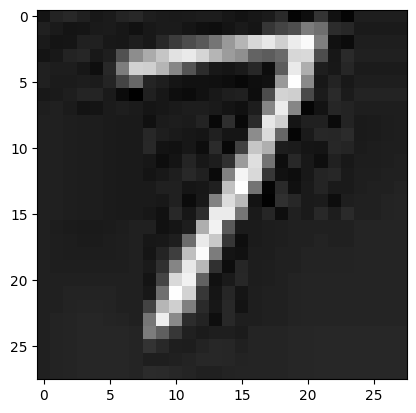

In [49]:
show_img(input_img)